In [10]:
# Import the libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input as pp16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input as pp19
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as pp_resnet
from tensorflow.keras.models import Model
from pathlib import Path
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np

### CBIR for VGG16

#### Define classes

In [3]:
class FeatureExtractor16:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG16(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
    
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pp16(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)# Iterate through images (Change the path based on your image location)


#### For each model, read the image features for the dataset.

In [77]:
# Read image features
fe16 = FeatureExtractor16()
features16 = []
img_paths = []
count = 0
for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
    try:
        # Extract Features
        feature = fe16.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
        # Save the Numpy array (.npy) on designated path
        feature_path = "./features16/" + img_path.split('.')[0] + "_features.npy"
        np.save(feature_path, feature)
        # Add the saved features into a working array
        features16.append(np.load(feature_path))
        # Add the image path to a working array
        img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
    except:
        print("Error extracting features: " + img_path)
        os.replace("C:/Users/junah/Pictures/A/"+img_path, "C:/Users/junah/Pictures/non-extract/"+img_path)
print("Count:" + str(count))
features16 = np.array(features16)

C:\Users\junah\anaconda3\lib\site-packages\PIL\Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Error extracting features: sv1S82nxY5RMYma9lyjNvC7vGUJ41PXr2IhGp0RwS5Y.jpg
Count:0


#### Query Monet.jpg for each model and display results
#### Comparisons between features are measured with Euclidean distance

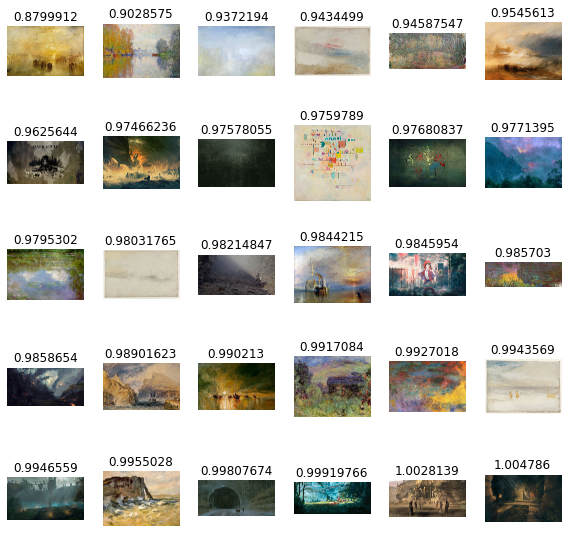

In [11]:
# Insert the image query
img = Image.open("./query/Monet.jpg")

# Extract its features
query = fe16.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features16 - query, axis=1)

# first value omitted as it is a copy of the Monet query
# Extract 30 images that have lowest distance
ids = np.argsort(dists)[0:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(0,30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [8]:
count=0
for rel_img in os.listdir("./relevant/Monet"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

Relevant images retrieved: 6


In [147]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\going-to-the-ball-san-martino-1846.jpg
C:\Users\junah\Pictures\A\autumn-on-the-seine-at-argenteuil.jpg
C:\Users\junah\Pictures\A\venice-with-the-salute-1845.jpg
C:\Users\junah\Pictures\A\red-sky-over-a-beach-1845.jpg
C:\Users\junah\Pictures\A\japanese-bridge-by-claude-monet-mus-e-marmottan-monet-5079.jpg
C:\Users\junah\Pictures\A\wreckers-coast-of-northumberland.jpg
C:\Users\junah\Pictures\A\dark souls artorias grave sif darkwood.jpg
C:\Users\junah\Pictures\A\anato-finnstark-web-petit.jpg
C:\Users\junah\Pictures\A\1361045702104.jpg
C:\Users\junah\Pictures\A\Wassily_Kandinsky_-_Gentle_accent.jpg
C:\Users\junah\Pictures\A\1414165607828.jpg
C:\Users\junah\Pictures\A\matthew-sellers-gathering.jpg
C:\Users\junah\Pictures\A\monet.wl-clouds.jpg
C:\Users\junah\Pictures\A\ship-in-a-storm-1845.jpg
C:\Users\junah\Pictures\A\kqsoyfyc7ro61.jpg
C:\Users\junah\Pictures\A\the-fighting-temeraire-tugged-to-her-last-berth-to-be-broken-up-1839.jpg
C:\Users\junah\Pictures\A\wallha

#### Run an image query on Kandinsky.jpg

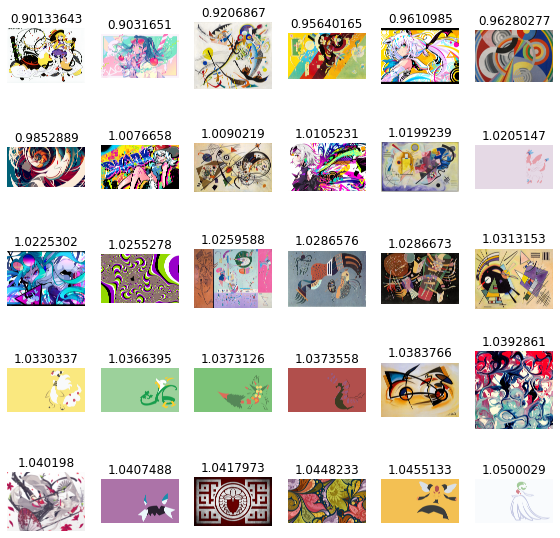

In [148]:
# Insert the image query
img = Image.open("./query/kandinsky.jpg")

# Extract its features
query = fe16.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features16 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [82]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\__moriya_suwako_touhou_drawn_by_ideolo__9a900f91cd915535057175f81a814671.png
C:\Users\junah\Pictures\A\fqke3spgul971.jpg
C:\Users\junah\Pictures\A\blue-segment.jpg
C:\Users\junah\Pictures\A\Kandinsky_o9ZJf5L-kandinsky-wallpaper.jpg
C:\Users\junah\Pictures\A\berry_verrine_fubuki_82260158_p0.jpg
C:\Users\junah\Pictures\A\robertdelaunayrythme1.jpg
C:\Users\junah\Pictures\A\87230112_p0.png
C:\Users\junah\Pictures\A\berry_verrine_gura_84505651_p0.png
C:\Users\junah\Pictures\A\Kandinsky_zXrIZz0-kandinsky-wallpaper.jpg
C:\Users\junah\Pictures\A\78315132_p0.png
C:\Users\junah\Pictures\A\Kandinsky_kandinsky-jaune-rouge-bleu.jpgHD_.jpg
C:\Users\junah\Pictures\A\sylveon.png
C:\Users\junah\Pictures\A\chd5vdralsp61.jpg
C:\Users\junah\Pictures\A\1407182557205.jpg
C:\Users\junah\Pictures\A\Kandinsky_various parts.jpg
C:\Users\junah\Pictures\A\Kandinsky_929305109e9762bcb96ae912f881caa0.jpg
C:\Users\junah\Pictures\A\Wassily Kandinsky Composition X.png
C:\Users\junah\Pictures\A

9 relevant images

Run the query on the remaining artist query images

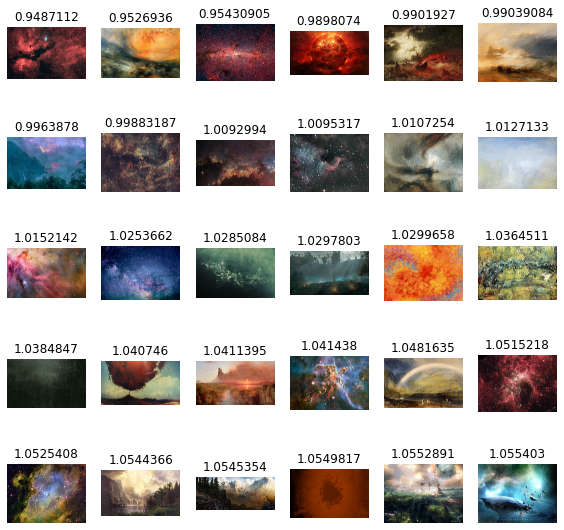

In [83]:
# Insert the image query
img = Image.open("./query/Turner.jpg")

# Extract its features
query = fe16.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features16 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

4 relevant images

In [84]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\GammaCygniLRGB1600.jpg
C:\Users\junah\Pictures\A\goldau.jpg
C:\Users\junah\Pictures\A\PIA03654~orig.jpg
C:\Users\junah\Pictures\A\1361048188899.jpg
C:\Users\junah\Pictures\A\ug9kj4sryup71.jpg
C:\Users\junah\Pictures\A\wreckers-coast-of-northumberland.jpg
C:\Users\junah\Pictures\A\matthew-sellers-gathering.jpg
C:\Users\junah\Pictures\A\51697283494_9bbd988a28_o.png
C:\Users\junah\Pictures\A\qvrild9s4h581.jpg
C:\Users\junah\Pictures\A\ni5tunwtz2l61.jpg
C:\Users\junah\Pictures\A\snow-storm-steam-boat-off-a-harbour-s-mouth.jpg
C:\Users\junah\Pictures\A\venice-with-the-salute-1845.jpg
C:\Users\junah\Pictures\A\1408632503714.jpg
C:\Users\junah\Pictures\A\1 QCFDDzRri5TbYnRWefOV9w.jpeg
C:\Users\junah\Pictures\A\1361046384867.jpg
C:\Users\junah\Pictures\A\hd2h7hcofuk61.png
C:\Users\junah\Pictures\A\kiwitee-kiwitee-abstract01.jpg
C:\Users\junah\Pictures\A\the-japanis-bridge-footbridge-over-the-water-lily-pond-1924.jpg
C:\Users\junah\Pictures\A\1361045702104.jpg
C:\Users\

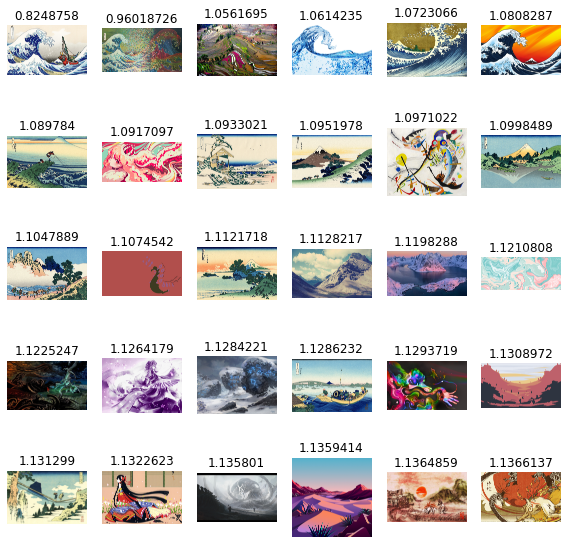

In [85]:
# Insert the image query
img = Image.open("./query/Hokusai.jpg")

# Extract its features
query = fe16.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features16 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

9 relevant images

In [86]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\f8dIV.jpg
C:\Users\junah\Pictures\A\70ay83k26tw61.jpg
C:\Users\junah\Pictures\A\1402586360989.jpg
C:\Users\junah\Pictures\A\1470090882403.jpg
C:\Users\junah\Pictures\A\a-colored-version-of-the-big-wave.jpg
C:\Users\junah\Pictures\A\36372.jpg
C:\Users\junah\Pictures\A\kajikazawa-in-kai-province.jpg
C:\Users\junah\Pictures\A\bffnwvhma6d71.png
C:\Users\junah\Pictures\A\tea-house-at-koishikawa-the-morning-after-a-snowfall.jpg
C:\Users\junah\Pictures\A\inume-pass-in-the-kai-province.jpg
C:\Users\junah\Pictures\A\blue-segment.jpg
C:\Users\junah\Pictures\A\the-fuji-reflects-in-lake-kawaguchi-seen-from-the-misaka-pass-in-the-kai-province.jpg
C:\Users\junah\Pictures\A\the-back-of-the-fuji-from-the-minobu-river.jpg
C:\Users\junah\Pictures\A\scolipede.jpg
C:\Users\junah\Pictures\A\shichiri-beach-in-sagami-province.jpg
C:\Users\junah\Pictures\A\1402467675043.jpg
C:\Users\junah\Pictures\A\04fflf8f4f761.jpg
C:\Users\junah\Pictures\A\9r3q8ewoqxp61.jpg
C:\Users\junah\Pictures

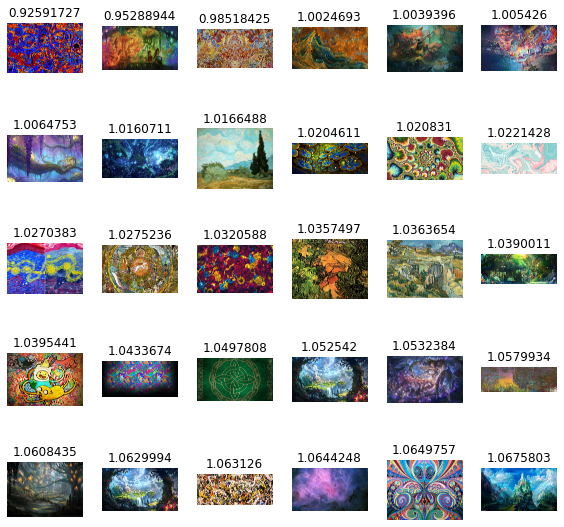

In [87]:
# Insert the image query
img = Image.open("./query/Gogh.jpg")

# Extract its features
query = fe16.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features16 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

3 relevant images

In [88]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\6hopzmekwi281.jpg
C:\Users\junah\Pictures\A\24915544.jpg
C:\Users\junah\Pictures\A\1399225728242.jpg
C:\Users\junah\Pictures\A\15anf57z9dz41.jpg
C:\Users\junah\Pictures\A\grace-liu-beyond-human-deliverable-comp-a.jpg
C:\Users\junah\Pictures\A\by3cndt293w61.jpg
C:\Users\junah\Pictures\A\bianca-morelos-canopy3.jpg
C:\Users\junah\Pictures\A\1493659753612.jpg
C:\Users\junah\Pictures\A\wheat-field-with-cypresses-1889.jpg
C:\Users\junah\Pictures\A\hjb738ebkem61.png
C:\Users\junah\Pictures\A\1399225560405.jpg
C:\Users\junah\Pictures\A\9r3q8ewoqxp61.jpg
C:\Users\junah\Pictures\A\1399498272658.jpg
C:\Users\junah\Pictures\A\Okami_Wallpaper_size_by_ashiong.jpg
C:\Users\junah\Pictures\A\32204.jpg
C:\Users\junah\Pictures\A\entrance-to-a-quarry-1889(1).jpg
C:\Users\junah\Pictures\A\entrance-to-a-quarry-near-saint-remy-1889(1).jpg
C:\Users\junah\Pictures\A\1402468355774.jpg
C:\Users\junah\Pictures\A\1407181958021.jpg
C:\Users\junah\Pictures\A\1501288024828.jpg
C:\Users\junah

### CBIR for models: VGG19, Resnet50, Resnet 101, Resnet 152

#### VGG19

In [12]:
class FeatureExtractor19:
    def __init__(self):
        # Use VGG-16 as the architecture and ImageNet for the weight
        base_model = VGG19(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)    
    
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pp19(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)# Iterate through images (Change the path based on your image location)

In [90]:
# Read image features
fe19 = FeatureExtractor19()
features19 = []
img_paths = []
for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
    try:
        # Extract Features
        feature = fe19.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
        # Save the Numpy array (.npy) on designated path
        feature_path = "./features19/" + img_path.split('.')[0] + "_features.npy"
        np.save(feature_path, feature)
        # Add the saved features into a working array
        features19.append(np.load(feature_path))
        # Add the image path to a working array
        img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
    except:
        print("Error extracting features: " + img_path)
features19 = np.array(features19)

In [15]:
# # Read image features
# fe19 = FeatureExtractor19()
# features19 = []
# img_paths = []
# count = 0
# for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
#     try:
#         feature_path = "./features19/" + img_path.split('.')[0] + "_features.npy"
#         # Add the saved features into a working array
#         features19.append(np.load(feature_path))
#         # Add the image path to a working array
#         img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
#     except:
#         print("Error extracting features: " + img_path)
#         os.replace("C:/Users/junah/Pictures/A/"+img_path, "C:/Users/junah/Pictures/non-extract/"+img_path)
# print("Count:" + str(count))
# features19 = np.array(features19)

Count:0


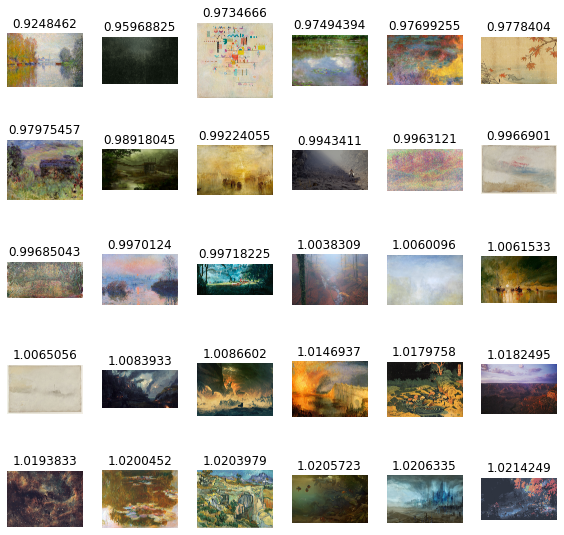

In [16]:
# Insert the image query
img = Image.open("./query/Monet.jpg")

# Extract its features
query = fe19.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features19 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [19]:
count=0
for rel_img in os.listdir("./relevant/Monet"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

Relevant images retrieved: 6


In [17]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\autumn-on-the-seine-at-argenteuil.jpg
C:\Users\junah\Pictures\A\1361045702104.jpg
C:\Users\junah\Pictures\A\Wassily_Kandinsky_-_Gentle_accent.jpg
C:\Users\junah\Pictures\A\monet.wl-clouds.jpg
C:\Users\junah\Pictures\A\water-lily-pond-evening-left-panel-1926.jpg
C:\Users\junah\Pictures\A\campaignloadingscreen1.jpg
C:\Users\junah\Pictures\A\the-house-seen-through-the-roses.jpg
C:\Users\junah\Pictures\A\amazon_by_joakimolofsson_d38huqx.jpg
C:\Users\junah\Pictures\A\going-to-the-ball-san-martino-1846.jpg
C:\Users\junah\Pictures\A\kqsoyfyc7ro61.jpg
C:\Users\junah\Pictures\A\SiYNsIA.jpg
C:\Users\junah\Pictures\A\red-sky-over-a-beach-1845.jpg
C:\Users\junah\Pictures\A\japanese-bridge-by-claude-monet-mus-e-marmottan-monet-5079.jpg
C:\Users\junah\Pictures\A\sunset-on-the-seine-at-lavacourt-winter-effect.jpg
C:\Users\junah\Pictures\A\i6zzy33ubui61.png
C:\Users\junah\Pictures\A\zaZEwhr.jpg
C:\Users\junah\Pictures\A\venice-with-the-salute-1845.jpg
C:\Users\junah\Pictures\

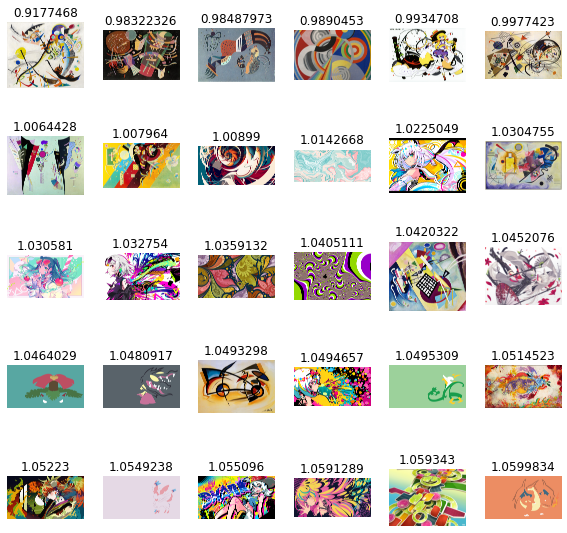

In [94]:
# Insert the image query
img = Image.open("./query/Kandinsky.jpg")

# Extract its features
query = fe19.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features19 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

9 relevant images

In [95]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\blue-segment.jpg
C:\Users\junah\Pictures\A\Wassily Kandinsky Composition X.png
C:\Users\junah\Pictures\A\Kandinsky_929305109e9762bcb96ae912f881caa0.jpg
C:\Users\junah\Pictures\A\robertdelaunayrythme1.jpg
C:\Users\junah\Pictures\A\__moriya_suwako_touhou_drawn_by_ideolo__9a900f91cd915535057175f81a814671.png
C:\Users\junah\Pictures\A\Kandinsky_zXrIZz0-kandinsky-wallpaper.jpg
C:\Users\junah\Pictures\A\Kandinsky_reciprocal-accords-1942.jpg
C:\Users\junah\Pictures\A\Kandinsky_o9ZJf5L-kandinsky-wallpaper.jpg
C:\Users\junah\Pictures\A\87230112_p0.png
C:\Users\junah\Pictures\A\9r3q8ewoqxp61.jpg
C:\Users\junah\Pictures\A\berry_verrine_fubuki_82260158_p0.jpg
C:\Users\junah\Pictures\A\Kandinsky_kandinsky-jaune-rouge-bleu.jpgHD_.jpg
C:\Users\junah\Pictures\A\fqke3spgul971.jpg
C:\Users\junah\Pictures\A\78315132_p0.png
C:\Users\junah\Pictures\A\floralpattern3095j4593g.jpg
C:\Users\junah\Pictures\A\1407182557205.jpg
C:\Users\junah\Pictures\A\Kandinsky_black-frame.jpg
C:\Users

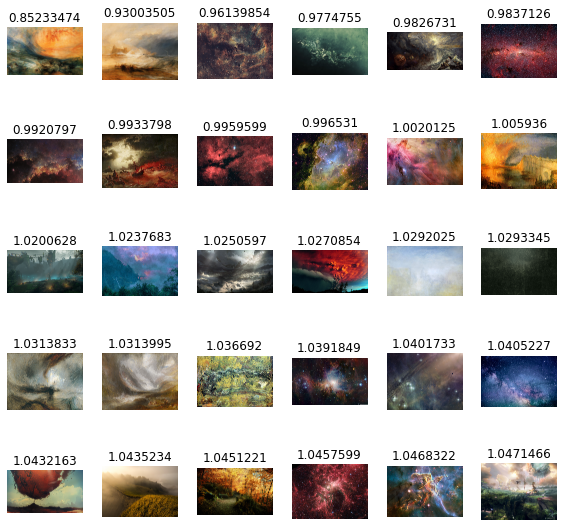

In [96]:
# Insert the image query
img = Image.open("./query/Turner.jpg")

# Extract its features
query = fe19.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features19 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

6 relevant images

In [97]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\goldau.jpg
C:\Users\junah\Pictures\A\wreckers-coast-of-northumberland.jpg
C:\Users\junah\Pictures\A\51697283494_9bbd988a28_o.png
C:\Users\junah\Pictures\A\1361046384867.jpg
C:\Users\junah\Pictures\A\caelan-stokkermans-interloper-final-clean.jpg
C:\Users\junah\Pictures\A\PIA03654~orig.jpg
C:\Users\junah\Pictures\A\qvrild9s4h581.jpg
C:\Users\junah\Pictures\A\ug9kj4sryup71.jpg
C:\Users\junah\Pictures\A\GammaCygniLRGB1600.jpg
C:\Users\junah\Pictures\A\Inside-the-Eagle-Nebula.jpg
C:\Users\junah\Pictures\A\1408632503714.jpg
C:\Users\junah\Pictures\A\the-burning-of-the-houses-of-parliament-1.jpg
C:\Users\junah\Pictures\A\hd2h7hcofuk61.png
C:\Users\junah\Pictures\A\matthew-sellers-gathering.jpg
C:\Users\junah\Pictures\A\f64b356bb571194dd8b47f9910550de6.jpg
C:\Users\junah\Pictures\A\1408633237182.jpg
C:\Users\junah\Pictures\A\venice-with-the-salute-1845.jpg
C:\Users\junah\Pictures\A\1361045702104.jpg
C:\Users\junah\Pictures\A\snow-storm-steam-boat-off-a-harbour-s-mouth

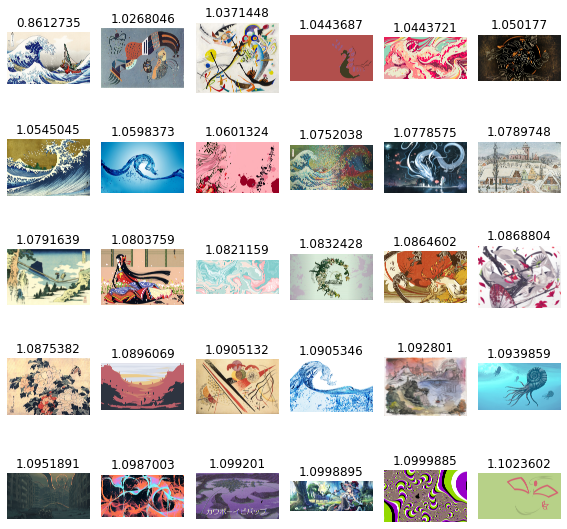

In [98]:
# Insert the image query
img = Image.open("./query/Hokusai.jpg")

# Extract its features
query = fe19.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features19 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

4 relevant images

In [99]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\f8dIV.jpg
C:\Users\junah\Pictures\A\Kandinsky_929305109e9762bcb96ae912f881caa0.jpg
C:\Users\junah\Pictures\A\blue-segment.jpg
C:\Users\junah\Pictures\A\scolipede.jpg
C:\Users\junah\Pictures\A\bffnwvhma6d71.png
C:\Users\junah\Pictures\A\jqtD5Gx.jpg
C:\Users\junah\Pictures\A\a-colored-version-of-the-big-wave.jpg
C:\Users\junah\Pictures\A\40814.jpg
C:\Users\junah\Pictures\A\118215.jpg
C:\Users\junah\Pictures\A\70ay83k26tw61.jpg
C:\Users\junah\Pictures\A\Konachan.com - 124752 sample.jpg
C:\Users\junah\Pictures\A\aen2bfhpdl261.jpg
C:\Users\junah\Pictures\A\minister-toru.jpg
C:\Users\junah\Pictures\A\Konachan.com - 102506 black_hair hakurei_reimu ideolo japanese_clothes long_hair red_eyes scan touhou.jpg
C:\Users\junah\Pictures\A\9r3q8ewoqxp61.jpg
C:\Users\junah\Pictures\A\danganronpa 2 maxresdefault.jpg
C:\Users\junah\Pictures\A\Okami-okami-amaterasu-9603060-1920-1200.jpg
C:\Users\junah\Pictures\A\1588261182589.png
C:\Users\junah\Pictures\A\poenies-and-butterfly.jp

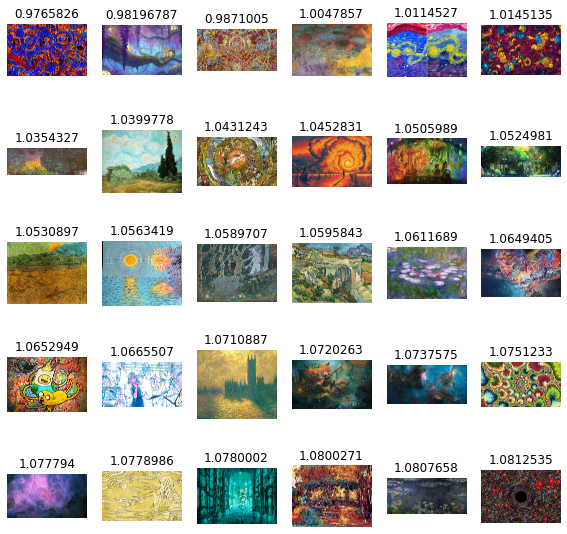

In [20]:
# Insert the image query
img = Image.open("./query/Gogh.jpg")

# Extract its features
query = fe19.extract(img)

# Calculate the similarity (distance) between images
dists = np.linalg.norm(features19 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [22]:
count=0
for rel_img in os.listdir("./relevant/Gogh"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

Relevant images retrieved: 3


In [101]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\6hopzmekwi281.jpg
C:\Users\junah\Pictures\A\bianca-morelos-canopy3.jpg
C:\Users\junah\Pictures\A\1399225728242.jpg
C:\Users\junah\Pictures\A\water-lily-pond-evening-left-panel-1926.jpg
C:\Users\junah\Pictures\A\1399498272658.jpg
C:\Users\junah\Pictures\A\32204.jpg
C:\Users\junah\Pictures\A\water-lilies-1926.jpg
C:\Users\junah\Pictures\A\wheat-field-with-cypresses-1889.jpg
C:\Users\junah\Pictures\A\Okami_Wallpaper_size_by_ashiong.jpg
C:\Users\junah\Pictures\A\3nw6vqx4q0721.png
C:\Users\junah\Pictures\A\24915544.jpg
C:\Users\junah\Pictures\A\1402468355774.jpg
C:\Users\junah\Pictures\A\evening-landscape-with-rising-moon-1889(1).jpg
C:\Users\junah\Pictures\A\mfNmYJs.jpg
C:\Users\junah\Pictures\A\a1jjriyse2q71.jpg
C:\Users\junah\Pictures\A\entrance-to-a-quarry-near-saint-remy-1889(1).jpg
C:\Users\junah\Pictures\A\water-lilies-1024x673-1.jpg
C:\Users\junah\Pictures\A\impression-sunrise.jpg
C:\Users\junah\Pictures\A\by3cndt293w61.jpg
C:\Users\junah\Pictures\A\1407181

#### ResNet 50

In [8]:
class FeatureExtractor50:
    def __init__(self):
        # Use ResNet50 as the architecture and ImageNet for the weight
        base_model = ResNet50V2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)    
    
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pp_resnet(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)# Iterate through images (Change the path based on your image location)


In [ ]:
# Read image features
fe50 = FeatureExtractor50()
features50 = []
img_paths = []
for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
    try:
        # Extract Features
        feature = fe50.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
        # Save the Numpy array (.npy) on designated path
        feature_path = "./features50/" + img_path.split('.')[0] + "_features.npy"
        np.save(feature_path, feature)
        # Add the saved features into a working array
        features50.append(np.load(feature_path))
        # Add the image path to a working array
        img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
    except:
        print("Error extracting features: " + img_path)
features50 = np.array(features50)

C:\Users\junah\anaconda3\lib\site-packages\PIL\Image.py:2929: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


Error extracting features: -CKqNMIedqNGb-0nD-tlMduSmakH08wZNO36nVsMH0Q.jpg
Error extracting features: -hKxKisejouG3Ns_dkS1yYn3LY-IgbH-.jpg
Error extracting features: -Qw35-q7Zstz_ppV18m5JU4qewscRB_imtAJaJsVKFo.webp
Error extracting features: -w4Umf9UeKtOKosDk6zrodYk8FU48LACxoKY4k7QvUY.jpg
Error extracting features: 01loiqwj17l61.webp
Error extracting features: 05ns6om6vjs61.webp
Error extracting features: 05s9rxek1fm61.webp
Error extracting features: 0ekda21vzfl61.webp
Error extracting features: 0fxjqapsgia61.webp
Error extracting features: 0ijzlqYpDOjf-dYcGriYZpqz5nttugR6Sby_4clf4q4.jpg
Error extracting features: 0isNGHwQ-HqI0LyJZwHs89A5qs3jIih_NOIbF4k9T0c.webp
Error extracting features: 0k9eji08all61.webp
Error extracting features: 0ny0icy9kmk61.webp
Error extracting features: 0obctqtb62n71.webp
Error extracting features: 0vxq0fb0orr61.webp
Error extracting features: 0x0fskt8kmk61.webp
Error extracting features: 12esb4b4es361.webp


In [4]:
# # Read image features
# fe50 = FeatureExtractor50()
# features50 = []
# img_paths = []
# count = 0
# for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
#     try:
#         feature_path = "./features50/" + img_path.split('.')[0] + "_features.npy"
#         # Add the saved features into a working array
#         features50.append(np.load(feature_path))
#         # Add the image path to a working array
#         img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
#     except:
#         print("Error extracting features: " + img_path)
#         os.replace("C:/Users/junah/Pictures/A/"+img_path, "C:/Users/junah/Pictures/non-extract/"+img_path)
# print("Count:" + str(count))
# features50 = np.array(features50)

In [6]:
# Insert the image query
img = Image.open("./query/Monet.jpg")

# Extract its features
query = fe50.extract(img)

# Calculate the similarity (distance) between images    
dists = np.linalg.norm(features50 - query, axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

ValueError: operands could not be broadcast together with shapes (0,) (2048,) 

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Monet"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Kandinsky.jpg")

# Extract its features
query = fe50.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features50 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

4 Relevant images

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Turner.jpg")

# Extract its features
query = fe50.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features50 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Turner"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Hokusai.jpg")

# Extract its features
query = fe50.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features50 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Hokusai"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Gogh.jpg")

# Extract its features
query = fe50.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features50 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Gogh"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

#### ResNet 101

In [ ]:
class FeatureExtractor101:
    def __init__(self):
        # Use ResNet50 as the architecture and ImageNet for the weight
        base_model = ResNet101V2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)    
    
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pp_resnet(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)# Iterate through images (Change the path based on your image location)

In [ ]:
# Read image features
fe101 = FeatureExtractor101()
features101 = []
img_paths = []
for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
    try:
        # Extract Features
        feature = fe101.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
        # Save the Numpy array (.npy) on designated path
        feature_path = "./features101/" + img_path.split('.')[0] + "_features.npy"
        np.save(feature_path, feature)
        # Add the saved features into a working array
        features101.append(np.load(feature_path))
        # Add the image path to a working array
        img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
    except:
        print("Error extracting features: " + img_path)
features = np.array(features101)

In [ ]:
# # Read image features
# fe101 = FeatureExtractor101()
# features101 = []
# img_paths = []
# count = 0
# for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
#     try:
#         feature_path = "./features101/" + img_path.split('.')[0] + "_features.npy"
#         # Add the saved features into a working array
#         features101.append(np.load(feature_path))
#         # Add the image path to a working array
#         img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
#     except:
#         print("Error extracting features: " + img_path)
#         os.replace("C:/Users/junah/Pictures/A/"+img_path, "C:/Users/junah/Pictures/non-extract/"+img_path)
# print("Count:" + str(count))
# features101 = np.array(features101)

In [ ]:
# Insert the image query
img = Image.open("./query/Monet.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Monet"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Kandinsky.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Kandinsky"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Turner.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Turner"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Hokusai.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Hokusai"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Gogh.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Gogh"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

#### ResNet 152

In [11]:
class FeatureExtractor152:
    def __init__(self):
        # Use ResNet50 as the architecture and ImageNet for the weight
        base_model = ResNet152V2(weights='imagenet')
        # Customize the model to return features from fully-connected layer
        self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('avg_pool').output)    
    
    def extract(self, img):
        # Resize the image
        img = img.resize((224, 224))
        # Convert the image color space
        img = img.convert('RGB')
        # Reformat the image
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = pp_resnet(x)
        # Extract Features
        feature = self.model.predict(x)[0]
        return feature / np.linalg.norm(feature)# Iterate through images (Change the path based on your image location)

In [12]:
# # Read image features
# fe152 = FeatureExtractor152()
# features152 = []
# img_paths = []
# for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
#     try:
#         # Extract Features
#         feature = fe152.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
#         # Save the Numpy array (.npy) on designated path
#         feature_path = "./features152/" + img_path.split('.')[0] + "_features.npy"
#         np.save(feature_path, feature)
#         # Add the saved features into a working array
#         features152.append(np.load(feature_path))
#         # Add the image path to a working array
#         img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
#     except:
#         print("Error extracting features: " + img_path)
# features152 = np.array(features)

In [13]:
# Read image features
fe152 = FeatureExtractor152()
features152 = []
img_paths = []
for img_path in os.listdir("C:\\Users\\junah\\Pictures\\A"):
    try:        
        # Extract Features
        # feature = fe152.extract(img=Image.open("C:/Users/junah/Pictures/A/" + img_path))
        # Save the Numpy array (.npy) on designated path
        feature_path = "./features101/" + img_path.split('.')[0] + "_features.npy"
        #np.save(feature_path, feature)
        # Add the saved features into a working array
        features152.append(np.load(feature_path))
        # Add the image path to a working array
        img_paths.append(Path("C:/Users/junah/Pictures/A/") / img_path)
    except:
        print("Error extracting features: " + img_path)
        os.replace("C:/Users/junah/Pictures/A/"+img_path, "C:/Users/junah/Pictures/non-extract/"+img_path)
features152 = np.array(features152)

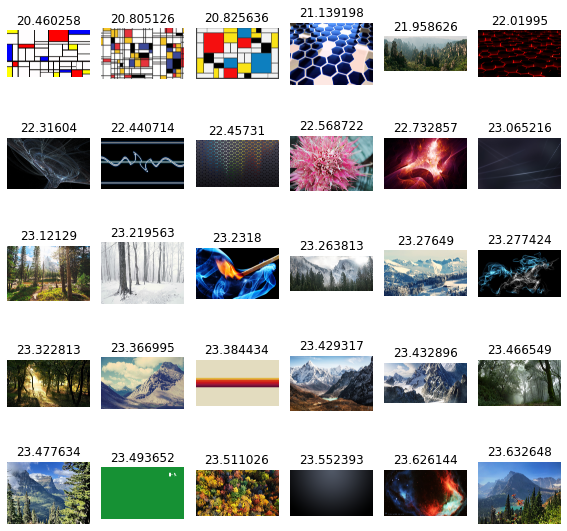

In [21]:
# Insert the image query
img = Image.open("./query/Monet.jpg")

# Extract its features
query = fe152.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features152 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [22]:
count=0
for rel_img in os.listdir("./relevant/Monet"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

Relevant images retrieved: 0


In [23]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\1525630.jpg
C:\Users\junah\Pictures\A\mondrian-modern-art-i37329.jpg
C:\Users\junah\Pictures\A\wp2037085.png
C:\Users\junah\Pictures\A\1402585954048.jpg
C:\Users\junah\Pictures\A\qnrsm544s6j61.webp
C:\Users\junah\Pictures\A\1459175871087.jpg
C:\Users\junah\Pictures\A\pcmech-03w-black-hole-power.jpg
C:\Users\junah\Pictures\A\36529.jpg
C:\Users\junah\Pictures\A\index.jpg
C:\Users\junah\Pictures\A\o318627.jpg
C:\Users\junah\Pictures\A\44110.jpg
C:\Users\junah\Pictures\A\Graphite.jpg
C:\Users\junah\Pictures\A\FgFParx.jpg
C:\Users\junah\Pictures\A\39083.jpg
C:\Users\junah\Pictures\A\38468.jpg
C:\Users\junah\Pictures\A\149qzash5rj61.webp
C:\Users\junah\Pictures\A\1448656896796.jpg
C:\Users\junah\Pictures\A\tumblr_mdb9fmGg8u1r8ebpco5_1280.jpg
C:\Users\junah\Pictures\A\1407182369328.jpg
C:\Users\junah\Pictures\A\1402467675043.jpg
C:\Users\junah\Pictures\A\zsonyi0sqrs51.jpg
C:\Users\junah\Pictures\A\s6z3tnxu99a01.jpg
C:\Users\junah\Pictures\A\caradhras_by_grivetart_d6q

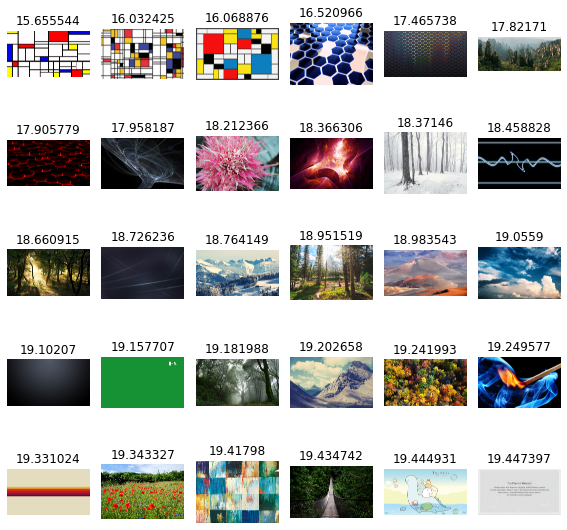

In [17]:
# Insert the image query
img = Image.open("./query/Kandinsky.jpg")

# Extract its features
query = fe152.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features152 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [18]:
count=0
for rel_img in os.listdir("./relevant/Kandinsky"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

Relevant images retrieved: 0


In [19]:
for file in files:
    print(file)

C:\Users\junah\Pictures\A\1525630.jpg
C:\Users\junah\Pictures\A\mondrian-modern-art-i37329.jpg
C:\Users\junah\Pictures\A\wp2037085.png
C:\Users\junah\Pictures\A\1402585954048.jpg
C:\Users\junah\Pictures\A\index.jpg
C:\Users\junah\Pictures\A\qnrsm544s6j61.webp
C:\Users\junah\Pictures\A\1459175871087.jpg
C:\Users\junah\Pictures\A\pcmech-03w-black-hole-power.jpg
C:\Users\junah\Pictures\A\o318627.jpg
C:\Users\junah\Pictures\A\44110.jpg
C:\Users\junah\Pictures\A\39083.jpg
C:\Users\junah\Pictures\A\36529.jpg
C:\Users\junah\Pictures\A\1407182369328.jpg
C:\Users\junah\Pictures\A\Graphite.jpg
C:\Users\junah\Pictures\A\1448656896796.jpg
C:\Users\junah\Pictures\A\FgFParx.jpg
C:\Users\junah\Pictures\A\224078.jpg
C:\Users\junah\Pictures\A\sky_blue_sky_baiyun_open_clean_love_air.jpg
C:\Users\junah\Pictures\A\graphite_gradient_by_msketchley-d3hlq1x.jpg
C:\Users\junah\Pictures\A\1356225935681.png
C:\Users\junah\Pictures\A\thxcKLt.jpg
C:\Users\junah\Pictures\A\1402467675043.jpg
C:\Users\junah\Pictures\

In [20]:
# Insert the image query
img = Image.open("./query/Turner.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

NameError: name 'fe101' is not defined

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Turner"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Hokusai.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Hokusai"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)

In [ ]:
# Insert the image query
img = Image.open("./query/Gogh.jpg")

# Extract its features
query = fe101.extract(img)

# Calculate the similarity (distance) between images    
dists = np.sum(np.abs(features101 - query), axis=1)

# Extract 30 images that have lowest distance
ids = np.argsort(dists)[:30]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes=[]
fig=plt.figure(figsize=(8,8))
files=[]
for a in range(30):
    try:
        score = scores[a]
        files.append(score[1])
        axes.append(fig.add_subplot(5, 6, a+1))
        subplot_title=str(score[0])
        axes[-1].set_title(subplot_title)  
        plt.axis('off')
        plt.imshow(Image.open(score[1]))
    except:
        print("Error incorrect image format")
fig.tight_layout()
plt.show()

In [ ]:
count=0
for rel_img in os.listdir("./relevant/Gogh"):
    for file in files:
        if os.path.basename(file) == rel_img:
            count += 1
print("Relevant images retrieved: " + str(count))

In [ ]:
for file in files:
    print(file)